In [85]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
ath = pd.read_csv('basicAthlete.csv')
ath.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)
ath.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


In [87]:
noArt = ath[~ath.Event.str.contains("Art")]
noArc = noArt[~ath.Event.str.contains("Architecture")]

C:\Users\acdc5\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [88]:
clean = noArc.dropna(subset=['Age', 'Weight', 'Height'])
clean = clean.sort_values('Year')

In [89]:
listOf = ['Weight', 'Height']
avg = clean.groupby(['Year', 'Event'])[listOf].transform('mean').fillna(0)
avg = avg.round(2)

In [90]:
avg.head()

,Weight,Height
214350,70.0,159.00
131869,72.0,177.17
56762,72.0,177.17
214357,69.0,171.33
214346,70.0,159.00


In [91]:
clean.drop(clean.columns.difference(['Sex', 'Year', 'Event', 'Sport']), 1, inplace=True)

In [92]:
clean.head()

,Sex,Year,Sport,Event
214350,M,1896,Gymnastics,Gymnastics Men's Horizontal Bar
131869,M,1896,Athletics,Athletics Men's 100 metres
56762,M,1896,Athletics,Athletics Men's 100 metres
214357,M,1896,Athletics,Athletics Men's Shot Put
214346,M,1896,Gymnastics,Gymnastics Men's Horse Vault


In [93]:
cleanAvg = pd.merge(clean, avg, left_index=True, right_index=True)
cleanAvg.head()

,Sex,Year,Sport,Event,Weight,Height
214350,M,1896,Gymnastics,Gymnastics Men's Horizontal Bar,70.0,159.00
131869,M,1896,Athletics,Athletics Men's 100 metres,72.0,177.17
56762,M,1896,Athletics,Athletics Men's 100 metres,72.0,177.17
214357,M,1896,Athletics,Athletics Men's Shot Put,69.0,171.33
214346,M,1896,Gymnastics,Gymnastics Men's Horse Vault,70.0,159.00


In [94]:
firstOc = cleanAvg.drop_duplicates(subset=['Event'], keep='first')

In [95]:
firstOc.head()

,Sex,Year,Sport,Event,Weight,Height
214350,M,1896,Gymnastics,Gymnastics Men's Horizontal Bar,70.0,159.00
131869,M,1896,Athletics,Athletics Men's 100 metres,72.0,177.17
214357,M,1896,Athletics,Athletics Men's Shot Put,69.0,171.33
214346,M,1896,Gymnastics,Gymnastics Men's Horse Vault,70.0,159.00
214347,M,1896,Gymnastics,Gymnastics Men's Parallel Bars,70.0,159.00


In [96]:
finalOc = cleanAvg.drop_duplicates(subset=['Event'], keep='last')

In [97]:
finalOc.head()

,Sex,Year,Sport,Event,Weight,Height
214348,M,1896,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",70.0,159.0
214352,M,1896,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",70.0,159.0
63071,M,1896,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",86.0,173.5
254345,M,1900,Swimming,"Swimming Men's 4,000 metres Freestyle",89.0,186.0
32176,M,1900,Swimming,"Swimming Men's 1,000 metres Freestyle",89.0,186.0


In [98]:
firstOc.head()

,Sex,Year,Sport,Event,Weight,Height
214350,M,1896,Gymnastics,Gymnastics Men's Horizontal Bar,70.0,159.00
131869,M,1896,Athletics,Athletics Men's 100 metres,72.0,177.17
214357,M,1896,Athletics,Athletics Men's Shot Put,69.0,171.33
214346,M,1896,Gymnastics,Gymnastics Men's Horse Vault,70.0,159.00
214347,M,1896,Gymnastics,Gymnastics Men's Parallel Bars,70.0,159.00


In [99]:
first = firstOc.rename({'Sex':'sexFirst', 'Year':'yearFirst', 'Sport':'sportFirst', 'Event':'eventFirst'},axis=1)
final = finalOc.rename({'Sex':'sexFinal', 'Year':'yearFinal', 'Sport':'sportFinal', 'Event':'eventFinal'},axis=1)

In [100]:
merge = pd.merge(first, final, left_on='eventFirst', right_on='eventFinal')

In [101]:
merge.head()

,sexFirst,yearFirst,sportFirst,eventFirst,Weight_x,Height_x,sexFinal,yearFinal,sportFinal,eventFinal,Weight_y,Height_y
0,M,1896,Gymnastics,Gymnastics Men's Horizontal Bar,70.0,159.00,M,2016,Gymnastics,Gymnastics Men's Horizontal Bar,63.20,167.66
1,M,1896,Athletics,Athletics Men's 100 metres,72.0,177.17,M,2016,Athletics,Athletics Men's 100 metres,74.42,177.06
2,M,1896,Athletics,Athletics Men's Shot Put,69.0,171.33,M,2016,Athletics,Athletics Men's Shot Put,128.58,192.70
3,M,1896,Gymnastics,Gymnastics Men's Horse Vault,70.0,159.00,M,2016,Gymnastics,Gymnastics Men's Horse Vault,62.00,163.65
4,M,1896,Gymnastics,Gymnastics Men's Parallel Bars,70.0,159.00,M,2016,Gymnastics,Gymnastics Men's Parallel Bars,62.45,167.72


In [102]:
merge['heightDiff'] = merge['Height_y'] - merge['Height_x']
merge['weightDiff'] = merge['Weight_y'] - merge['Weight_x']

In [103]:
merge.drop(merge.columns.difference(['sexFirst', 'weightDiff', 'heightDiff', 'eventFirst', 'sportFirst']), 1, inplace=True)

In [104]:
merge.head()

,sexFirst,sportFirst,eventFirst,heightDiff,weightDiff
0,M,Gymnastics,Gymnastics Men's Horizontal Bar,8.66,-6.80
1,M,Athletics,Athletics Men's 100 metres,-0.11,2.42
2,M,Athletics,Athletics Men's Shot Put,21.37,59.58
3,M,Gymnastics,Gymnastics Men's Horse Vault,4.65,-8.00
4,M,Gymnastics,Gymnastics Men's Parallel Bars,8.72,-7.55


In [105]:
female = merge[~merge.sexFirst.str.contains("M")]
male = merge[~merge.sexFirst.str.contains("F")]

# Visualisations

In [106]:
topTenHeight = male.nlargest(10, ['heightDiff'])

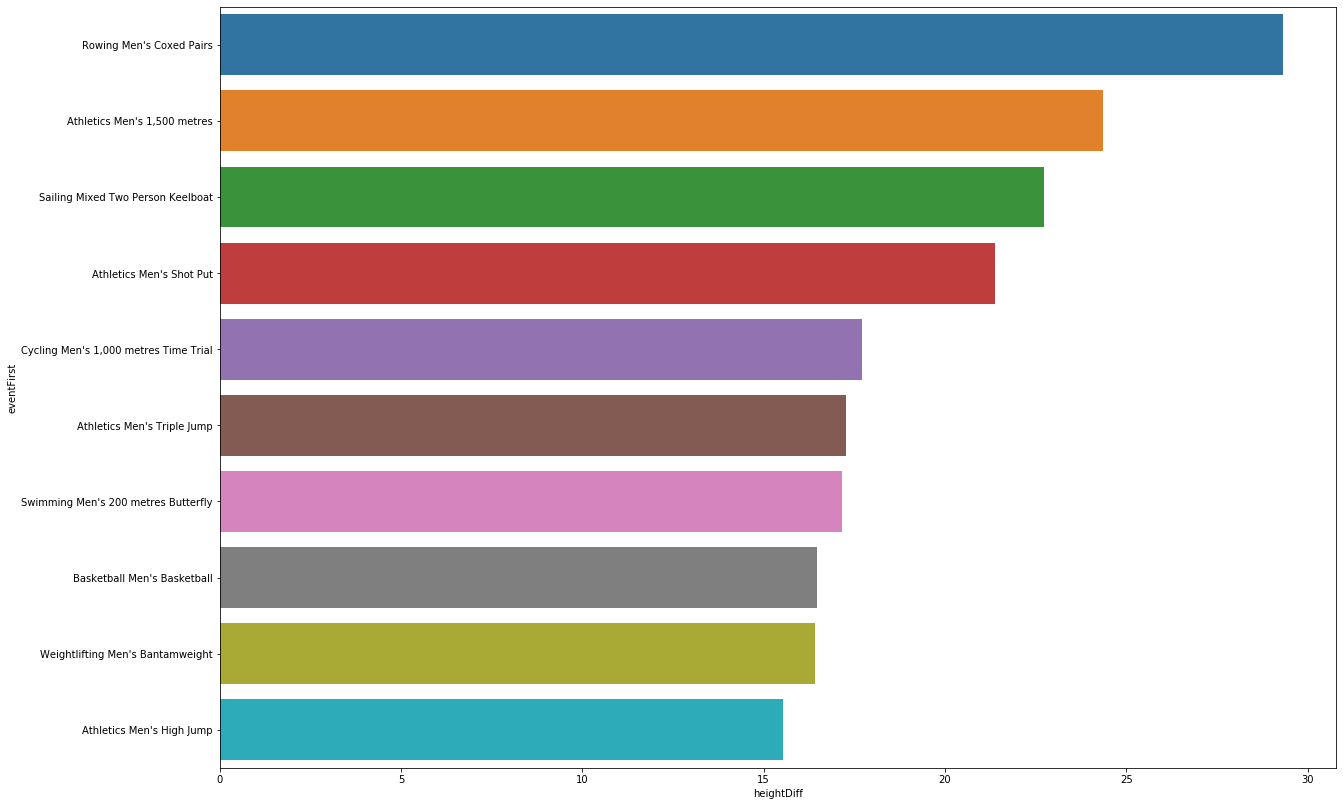

In [107]:
fig = plt.figure(figsize=(20,14))
ax = sns.barplot(y = topTenHeight['eventFirst'], x=topTenHeight['heightDiff'])
plt.show()

In [108]:
merge.to_csv('attributeDifferences.csv', sep=',')